# Notebook to generate a topographic map of the study area

### Required libraries

In [ ]:
# Instalar Conda en Colab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
# Instalar GMT y PyGMT desde el canal conda-forge
!mamba install -c conda-forge pygmt gmt


Looking for: ['pygmt', 'gmt']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch     3%[+] 0.3s
conda-forge/linux-64   5%
conda-forge/noarch    12%[+] 0.4s
conda-forge/linux-64  11%
conda-forge/noarch    26%[+] 0.5s
conda-forge/linux-64  16%
conda-forge/noarch    36%[+] 0.6s
conda-forge/linux-64  18%
conda-forge/noarch    46%[+] 0.7s
conda-forge/linux-64  22%
conda-forge/noarch    49%[+] 0.8s
conda-forge/linux-64  25%
conda-forge/noarch    56%[+] 0.9s
conda-forge/linux-64  28%
conda-forge/noarch    63%[+] 1.0s
conda-forge/linux-64  30%
conda-forge/noarch    67%[+] 1.1s
conda-forge/linux-64  31%
conda-forge/noarch    70%[+] 1.2s
conda-forge/linux-64  35%
conda-forge/noarch    78%[+] 1.3s
conda-forge/linux-64  38%
conda-forge/noarch    85%[+] 1.4s
conda-forge/linux-64  39%
conda-forge/noarch    87%[+] 1.5s
conda-forge/linux-64  42%
conda-forge/noarch    94%[+] 1.6s
conda-forge/linux-64  45%
conda-forge/noarch   100

In [ ]:
import pygmt

pygmt.show_versions()

PyGMT information:
  version: v0.16.0
System information:
  python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.1.123+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.1
  pandas: 2.3.1
  xarray: 2025.7.1
  packaging: 24.2
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.8.4
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


### Topographic map of the Neuquén Basin area

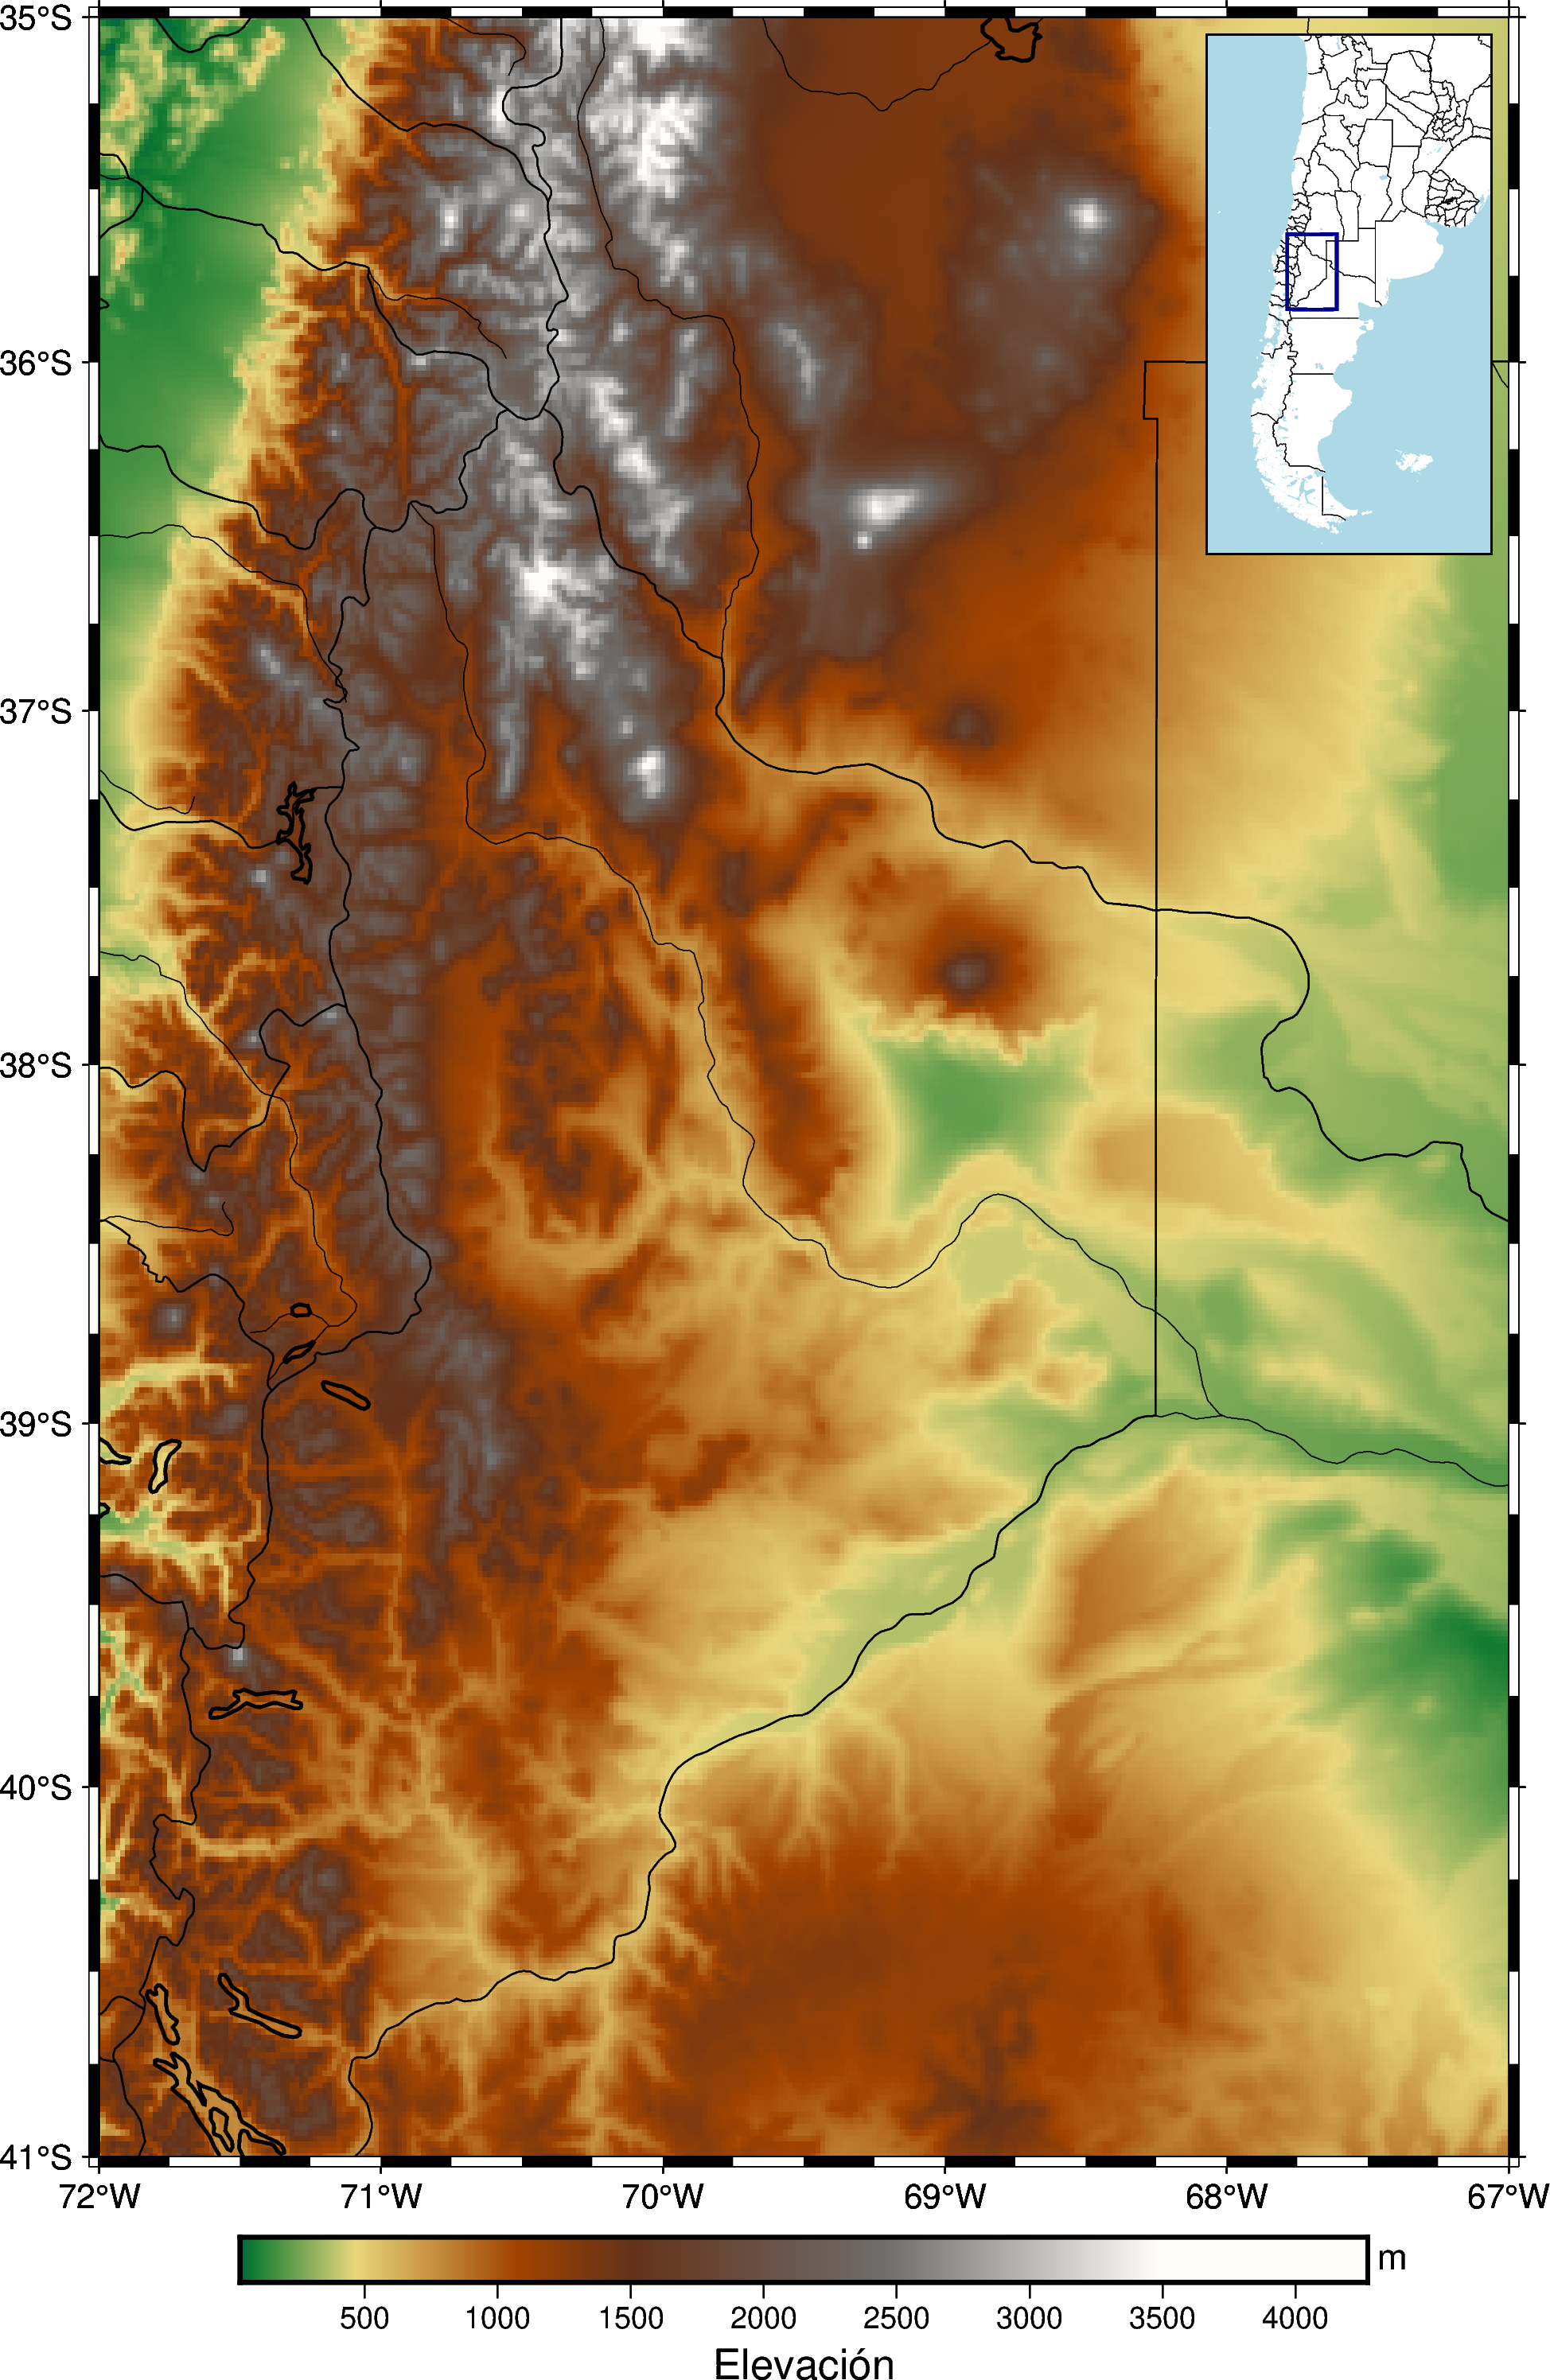

In [ ]:
region_z=[-72,-67,-41,-35]
#pygmt.show_versions()
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=region_z)
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="geo")
fig.colorbar(frame=["a500", "x+lElevación", "y+lm"])
fig.coast(region=region_z, frame=True, shorelines=1, resolution="h",borders=["1/0.5p","2/0.5p"],rivers=["r","gray","-"])
# Determine size of insert map
with fig.inset(position="jTR+w3c/5.5c+o0.2c", box="+pblack"):
     fig.coast(region=[-80,-52,-57,-17], projection="M3c", borders=["1/0.2p","2/0.2p"], resolution="h", land="white", water="lightblue")
     rectangle = [[region_z[0], region_z[2], region_z[1], region_z[3]]]
     fig.plot(data=rectangle, style="r+s", pen="1p,darkblue")
fig.savefig("mapa_nqn.png")
fig.show()